# Introduction to the Perceptron
## A Visual and Intuitive Approach

**Course: ARTI - SLA Robotic 2026**

---

## Table of Contents

1. [The Biological Inspiration](#biological)
2. [A Simple Mathematical Model](#model)
3. [Activation Functions](#activation)
4. [Manual Calculations: Your First Perceptron](#manual)
5. [Visual Understanding: Separating Points](#visual)
6. [From Manual to Matrix Operations](#matrix)
7. [Building a Classifier](#classifier)
8. [Exercises](#exercises)

---

## 1. The Biological Inspiration {#biological}

### The Neuron

A biological neuron has three main parts:
- **Dendrites**: Receive signals from other neurons
- **Cell body**: Processes the signals
- **Axon**: Sends output signal if threshold is reached

```
     Dendrites        Cell Body         Axon
        ↓                ↓                ↓
    Inputs  →  [Sum + Threshold]  →  Output
```

### The Perceptron Idea (1957)

Frank Rosenblatt asked: *"Can we build a simple mathematical model of this neuron?"*

The answer: **The Perceptron**
- Takes multiple inputs
- Multiplies each by a weight (importance)
- Sums everything up
- Decides: "Fire or not?"

---

## 2. A Simple Mathematical Model {#model}

### The Simplest Example: Two Inputs

Imagine you're deciding whether to go to the beach 🏖️

**Inputs:**
- $x_1$: Temperature (0 to 10 scale)
- $x_2$: Sunshine (0 to 10 scale)

**Weights** (how important each factor is):
- $w_1 = 0.7$: Temperature matters a lot
- $w_2 = 0.5$: Sunshine matters too

**Calculation:**
$$
\text{Score} = w_1 \cdot x_1 + w_2 \cdot x_2
$$

**Decision:**
- If Score ≥ 6: Go to the beach! ✅
- If Score < 6: Stay home ❌

### Example Calculation

Today: Temperature = 8, Sunshine = 7

$$
\text{Score} = 0.7 \times 8 + 0.5 \times 7 = 5.6 + 3.5 = 9.1
$$

9.1 ≥ 6 → **Go to the beach!** ✅

In [ ]:
# Let's code this simple example
import numpy as np

# Inputs
x1 = 8  # Temperature
x2 = 7  # Sunshine

# Weights
w1 = 0.7
w2 = 0.5

# Calculation
score = w1 * x1 + w2 * x2
print(f"Score: {score}")

# Decision
threshold = 6
if score >= threshold:
    print("Go to the beach! ✅")
else:
    print("Stay home ❌")

**Output:**
```
Score: 9.1
Go to the beach! ✅
```

---

## 3. Activation Functions {#activation}

### What is an Activation Function?

An **activation function** decides how to convert the score into an output.

Think of it as different decision-making styles:
- **Binary**: Yes or No (0 or 1)
- **Gradient**: How much yes? (smooth transition)

### Common Activation Functions

#### 3.1 Step Function (Original Perceptron)

**Rule:** 
- Output 1 if input ≥ 0
- Output 0 if input < 0

$$
f(x) = \begin{cases}
1 & \text{if } x \geq 0 \\
0 & \text{if } x < 0
\end{cases}
$$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create x values
x = np.linspace(-5, 5, 1000)

# Step function
def step_function(x):
    return np.where(x >= 0, 1, 0)

y = step_function(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y, 'b-', linewidth=2, label='Step Function')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.xlabel('Input', fontsize=12)
plt.ylabel('Output', fontsize=12)
plt.title('Step Function (Heaviside)', fontsize=14)
plt.ylim(-0.2, 1.2)
plt.legend()
plt.show()

#### 3.2 Sign Function

**Rule:**
- Output +1 if input ≥ 0
- Output -1 if input < 0

$$
f(x) = \begin{cases}
+1 & \text{if } x \geq 0 \\
-1 & \text{if } x < 0
\end{cases}
$$

This is useful when we want to classify into two classes: +1 or -1.

In [ ]:
def sign_function(x):
    return np.where(x >= 0, 1, -1)

y_sign = sign_function(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y_sign, 'r-', linewidth=2, label='Sign Function')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.xlabel('Input', fontsize=12)
plt.ylabel('Output', fontsize=12)
plt.title('Sign Function', fontsize=14)
plt.ylim(-1.5, 1.5)
plt.legend()
plt.show()

#### 3.3 Sigmoid Function (Smooth)

**Rule:** Smooth S-curve from 0 to 1

$$
f(x) = \frac{1}{1 + e^{-x}}
$$

**Advantage:** Smooth, differentiable (needed for learning!)

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

y_sigmoid = sigmoid(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y_sigmoid, 'g-', linewidth=2, label='Sigmoid')
plt.axhline(y=0.5, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.xlabel('Input', fontsize=12)
plt.ylabel('Output', fontsize=12)
plt.title('Sigmoid Function', fontsize=14)
plt.legend()
plt.show()

#### 3.4 ReLU (Modern Choice)

**Rule:** Pass positive values, zero out negative ones

$$
f(x) = \max(0, x)
$$

**Advantage:** Simple, fast, works well in deep networks!

In [ ]:
def relu(x):
    return np.maximum(0, x)

y_relu = relu(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y_relu, 'm-', linewidth=2, label='ReLU')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.xlabel('Input', fontsize=12)
plt.ylabel('Output', fontsize=12)
plt.title('ReLU (Rectified Linear Unit)', fontsize=14)
plt.legend()
plt.show()

#### 3.5 Comparison of All Functions

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Step
axes[0, 0].plot(x, step_function(x), 'b-', linewidth=2)
axes[0, 0].set_title('Step Function', fontsize=12)
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[0, 0].axvline(x=0, color='k', linestyle='--', alpha=0.3)

# Sign
axes[0, 1].plot(x, sign_function(x), 'r-', linewidth=2)
axes[0, 1].set_title('Sign Function', fontsize=12)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[0, 1].axvline(x=0, color='k', linestyle='--', alpha=0.3)

# Sigmoid
axes[1, 0].plot(x, sigmoid(x), 'g-', linewidth=2)
axes[1, 0].set_title('Sigmoid Function', fontsize=12)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].axhline(y=0.5, color='k', linestyle='--', alpha=0.3)
axes[1, 0].axvline(x=0, color='k', linestyle='--', alpha=0.3)

# ReLU
axes[1, 1].plot(x, relu(x), 'm-', linewidth=2)
axes[1, 1].set_title('ReLU Function', fontsize=12)
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axes[1, 1].axvline(x=0, color='k', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

**Key Insight:** For this course, we'll mainly use the **sign function** because it's simple for classification!

---

## 4. Manual Calculations: Your First Perceptron {#manual}

Let's build and test a perceptron **by hand** before using computers!

### Example 1: AND Logic Gate

**Goal:** Create a perceptron that mimics the AND gate.

**Truth Table:**

| $x_1$ | $x_2$ | AND Output |
|-------|-------|------------|
| 0     | 0     | 0          |
| 0     | 1     | 0          |
| 1     | 0     | 0          |
| 1     | 1     | 1          |

### Step 1: Choose Weights and Bias

Let's try:
- $w_1 = 1$
- $w_2 = 1$
- $b = -1.5$ (bias/threshold)

The perceptron calculates:
$$
z = w_1 \cdot x_1 + w_2 \cdot x_2 + b
$$

Then applies sign function:
$$
\text{output} = \begin{cases}
1 & \text{if } z \geq 0 \\
0 & \text{if } z < 0
\end{cases}
$$

### Step 2: Test All Inputs (By Hand!)

**Test 1:** $x_1 = 0, x_2 = 0$
$$
z = 1 \times 0 + 1 \times 0 + (-1.5) = -1.5
$$
$z < 0$ → **Output: 0** ✅ (Correct!)

**Test 2:** $x_1 = 0, x_2 = 1$
$$
z = 1 \times 0 + 1 \times 1 + (-1.5) = -0.5
$$
$z < 0$ → **Output: 0** ✅ (Correct!)

**Test 3:** $x_1 = 1, x_2 = 0$
$$
z = 1 \times 1 + 1 \times 0 + (-1.5) = -0.5
$$
$z < 0$ → **Output: 0** ✅ (Correct!)

**Test 4:** $x_1 = 1, x_2 = 1$
$$
z = 1 \times 1 + 1 \times 1 + (-1.5) = 0.5
$$
$z \geq 0$ → **Output: 1** ✅ (Correct!)

🎉 **Success!** Our perceptron implements AND!

### Step 3: Code It

In [ ]:
def perceptron_AND(x1, x2):
    """Simple AND gate perceptron"""
    w1 = 1.0
    w2 = 1.0
    b = -1.5
    
    # Calculate weighted sum
    z = w1 * x1 + w2 * x2 + b
    
    # Apply activation (step function)
    if z >= 0:
        return 1
    else:
        return 0

# Test all combinations
print("AND Gate Test:")
print(f"0 AND 0 = {perceptron_AND(0, 0)}")
print(f"0 AND 1 = {perceptron_AND(0, 1)}")
print(f"1 AND 0 = {perceptron_AND(1, 0)}")
print(f"1 AND 1 = {perceptron_AND(1, 1)}")

**Output:**
```
AND Gate Test:
0 AND 0 = 0
0 AND 1 = 0
1 AND 0 = 0
1 AND 1 = 1
```

### 📝 Exercise 4.1: OR Gate

**Your turn!** Design a perceptron for the OR gate.

**Truth Table:**

| $x_1$ | $x_2$ | OR Output |
|-------|-------|-----------|
| 0     | 0     | 0         |
| 0     | 1     | 1         |
| 1     | 0     | 1         |
| 1     | 1     | 1         |

**Hints:**
- Try $w_1 = 1, w_2 = 1$
- What bias $b$ would work?
- Test manually first!
- Then implement in code

In [ ]:
# Your solution here
def perceptron_OR(x1, x2):
    # Choose weights and bias
    w1 = ???
    w2 = ???
    b = ???
    
    z = w1 * x1 + w2 * x2 + b
    
    if z >= 0:
        return 1
    else:
        return 0

---

## 5. Visual Understanding: Separating Points {#visual}

### The Geometric View

A perceptron with 2 inputs draws a **line** in 2D space!

The equation:
$$
w_1 x_1 + w_2 x_2 + b = 0
$$

This is a line! Points on one side → Class 0, other side → Class 1

### Example: Visualizing AND Gate

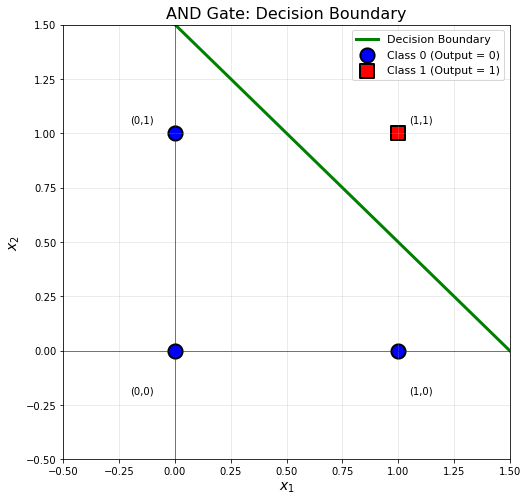

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# The 4 points from AND gate
points = np.array([
    [0, 0],  # (0,0) → class 0
    [0, 1],  # (0,1) → class 0
    [1, 0],  # (1,0) → class 0
    [1, 1]   # (1,1) → class 1
])

labels = np.array([0, 0, 0, 1])

# Plot the points
plt.figure(figsize=(8, 8))

# Class 0 points (blue circles)
class_0 = points[labels == 0]
plt.scatter(class_0[:, 0], class_0[:, 1], 
            s=200, c='blue', marker='o', 
            edgecolors='black', linewidth=2,
            label='Class 0 (Output = 0)')

# Class 1 points (red squares)
class_1 = points[labels == 1]
plt.scatter(class_1[:, 0], class_1[:, 1], 
            s=200, c='red', marker='s', 
            edgecolors='black', linewidth=2,
            label='Class 1 (Output = 1)')

# Draw the decision boundary
# w1*x1 + w2*x2 + b = 0
# x2 = -(w1*x1 + b) / w2
w1, w2, b = 1, 1, -1.5

x1_line = np.linspace(-0.5, 1.5, 100)
x2_line = -(w1 * x1_line + b) / w2

plt.plot(x1_line, x2_line, 'g-', linewidth=3, label='Decision Boundary')

# Add labels and formatting
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title('AND Gate: Decision Boundary', fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)

# Add text annotations
plt.text(-0.2, -0.2, '(0,0)', fontsize=10)
plt.text(-0.2, 1.05, '(0,1)', fontsize=10)
plt.text(1.05, -0.2, '(1,0)', fontsize=10)
plt.text(1.05, 1.05, '(1,1)', fontsize=10)

plt.show()

**Interpretation:**
- Green line = decision boundary
- Blue circles (Class 0) are below/left of the line
- Red square (Class 1) is above/right of the line

### 📝 Exercise 5.1: Visualize Your OR Gate

Plot the decision boundary for your OR gate solution!

In [ ]:
# Your solution here
# Hint: Use the same plotting code but with YOUR weights and bias

---

## 6. From Manual to Matrix Operations {#matrix}

### Why Matrices?

When we have **many examples** to test, manual calculation is tedious:

In [ ]:
# Testing 100 points manually? No way!
for i in range(100):
    z = w1*x1[i] + w2*x2[i] + b
    output[i] = sign(z)

**Solution:** Use matrix operations! Calculate everything at once.

### Vector Notation

Instead of writing:
$$
z = w_1 x_1 + w_2 x_2 + b
$$

We write:
$$
z = \mathbf{w}^T \mathbf{x} + b
$$

where:
- $\mathbf{w} = [w_1, w_2]^T$ (weights vector)
- $\mathbf{x} = [x_1, x_2]^T$ (input vector)
- $\mathbf{w}^T \mathbf{x}$ is the dot product

### Manual → Matrix Transition

**Manual way:**

In [ ]:
# One point at a time
x1, x2 = 1, 1
z = w1*x1 + w2*x2 + b
output = 1 if z >= 0 else 0

**Matrix way:**

In [ ]:
# Multiple points at once!
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

w = np.array([1, 1])
b = -1.5

# Compute all at once
z = X @ w + b  # Matrix multiplication!
outputs = (z >= 0).astype(int)

### Example: AND Gate with Matrices

In [ ]:
import numpy as np

# Define all 4 inputs as a matrix
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Define weights and bias
w = np.array([1.0, 1.0])
b = -1.5

print("Inputs:")
print(X)
print("\nWeights:", w)
print("Bias:", b)

# Compute weighted sums for ALL points
z = X @ w + b
print("\nWeighted sums (z):")
print(z)

# Apply activation function
outputs = (z >= 0).astype(int)
print("\nOutputs (after step function):")
print(outputs)

# Verify
print("\nTruth table verification:")
for i in range(4):
    print(f"{X[i]} → {outputs[i]}")

**Output:**
```
Inputs:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]

Weights: [1. 1.]
Bias: -1.5

Weighted sums (z):
[-1.5 -0.5 -0.5  0.5]

Outputs (after step function):
[0 0 0 1]

Truth table verification:
[0 0] → 0
[0 1] → 0
[1 0] → 0
[1 1] → 1
```

### Understanding the Matrix Multiplication

Let's break down `X @ w`:

$$
\begin{bmatrix}
0 & 0 \\
0 & 1 \\
1 & 0 \\
1 & 1
\end{bmatrix}
\begin{bmatrix}
1 \\
1
\end{bmatrix}
=
\begin{bmatrix}
0 \times 1 + 0 \times 1 \\
0 \times 1 + 1 \times 1 \\
1 \times 1 + 0 \times 1 \\
1 \times 1 + 1 \times 1
\end{bmatrix}
=
\begin{bmatrix}
0 \\
1 \\
1 \\
2
\end{bmatrix}
$$

Then add bias: $[0, 1, 1, 2] + (-1.5) = [-1.5, -0.5, -0.5, 0.5]$

**Key advantage:** One operation for all points! ⚡

---

## 7. Building a Classifier {#classifier}

### Real Problem: Separating Two Classes

Let's create a **realistic** classification problem with random data!

**Scenario:** Classify students into "Pass" or "Fail" based on:
- $x_1$: Hours studied
- $x_2$: Previous exam score

### Generate Synthetic Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate "Pass" students (Class 1) - red squares
n_pass = 30
pass_hours = np.random.uniform(5, 10, n_pass)      # 5-10 hours
pass_scores = np.random.uniform(60, 90, n_pass)    # 60-90 score
pass_class = np.ones(n_pass)

# Generate "Fail" students (Class 0) - blue circles
n_fail = 30
fail_hours = np.random.uniform(0, 6, n_fail)       # 0-6 hours
fail_scores = np.random.uniform(20, 65, n_fail)    # 20-65 score
fail_class = np.zeros(n_fail)

# Combine data
X = np.vstack([
    np.column_stack([fail_hours, fail_scores]),
    np.column_stack([pass_hours, pass_scores])
])
y = np.concatenate([fail_class, pass_class])

print(f"Dataset: {len(X)} students")
print(f"Features: {X.shape[1]} (hours studied, exam score)")
print(f"Pass: {int(np.sum(y))}, Fail: {int(len(y) - np.sum(y))}")

### Visualize the Data

In [ ]:
plt.figure(figsize=(10, 8))

# Plot Fail students (blue circles)
plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            s=100, c='blue', marker='o', 
            edgecolors='black', linewidth=1.5,
            label='Fail (Class 0)', alpha=0.7)

# Plot Pass students (red squares)
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
            s=100, c='red', marker='s', 
            edgecolors='black', linewidth=1.5,
            label='Pass (Class 1)', alpha=0.7)

plt.xlabel('Hours Studied', fontsize=14)
plt.ylabel('Previous Exam Score', fontsize=14)
plt.title('Student Classification Problem', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

### Design a Perceptron to Separate Them

Let's think intuitively:
- More hours studied → More likely to pass
- Higher previous score → More likely to pass

So both weights should be **positive**:

In [ ]:
# Intuitive weights
w1 = 2.0   # Hours studied (important!)
w2 = 0.5   # Previous score (moderately important)
b = -60.0  # Threshold

w = np.array([w1, w2])

print(f"Weights: w1={w1}, w2={w2}")
print(f"Bias: b={b}")
print(f"\nDecision boundary equation:")
print(f"{w1}*hours + {w2}*score + {b} = 0")

### Test the Perceptron

In [ ]:
# Compute predictions for all students
z = X @ w + b
y_pred = (z >= 0).astype(int)

# Calculate accuracy
accuracy = np.mean(y_pred == y)
print(f"\nAccuracy: {accuracy * 100:.1f}%")

# Show some predictions
print("\nSample predictions:")
for i in range(5):
    hours, score = X[i]
    actual = "Pass" if y[i] == 1 else "Fail"
    predicted = "Pass" if y_pred[i] == 1 else "Fail"
    match = "✓" if y[i] == y_pred[i] else "✗"
    print(f"{match} Hours: {hours:.1f}, Score: {score:.1f} | "
          f"Actual: {actual}, Predicted: {predicted}")

### Visualize the Decision Boundary

In [ ]:
plt.figure(figsize=(10, 8))

# Plot the points
plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            s=100, c='blue', marker='o', 
            edgecolors='black', linewidth=1.5,
            label='Fail (Class 0)', alpha=0.7)
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
            s=100, c='red', marker='s', 
            edgecolors='black', linewidth=1.5,
            label='Pass (Class 1)', alpha=0.7)

# Draw decision boundary
# w1*x1 + w2*x2 + b = 0
# x2 = -(w1*x1 + b) / w2
x1_line = np.linspace(0, 10, 100)
x2_line = -(w[0] * x1_line + b) / w[1]

plt.plot(x1_line, x2_line, 'g-', linewidth=3, 
         label='Decision Boundary', alpha=0.8)

# Shade regions
x1_fill = np.linspace(0, 10, 100)
x2_fill = -(w[0] * x1_fill + b) / w[1]
plt.fill_between(x1_fill, x2_fill, 100, alpha=0.1, color='red', 
                 label='Pass Region')
plt.fill_between(x1_fill, 0, x2_fill, alpha=0.1, color='blue', 
                 label='Fail Region')

plt.xlabel('Hours Studied', fontsize=14)
plt.ylabel('Previous Exam Score', fontsize=14)
plt.title(f'Student Classifier (Accuracy: {accuracy*100:.1f}%)', fontsize=16)
plt.legend(fontsize=11, loc='lower right')
plt.grid(True, alpha=0.3)
plt.xlim(0, 10)
plt.ylim(20, 90)
plt.show()

### Understanding the Decision Boundary

The line represents: **"The minimum combination to pass"**

$$
2.0 \times \text{hours} + 0.5 \times \text{score} - 60 = 0
$$

Rearranging:
$$
\text{score} = 120 - 4 \times \text{hours}
$$

**Interpretation:**
- If you study 0 hours, you need a score of 120 (impossible! → Fail)
- If you study 5 hours, you need a score of 100 (very high!)
- If you study 10 hours, you need a score of 80 (reasonable!)

### Test with New Students

In [ ]:
# New students to classify
new_students = np.array([
    [3, 50],   # 3 hours, score 50
    [7, 70],   # 7 hours, score 70
    [9, 85],   # 9 hours, score 85
    [2, 40],   # 2 hours, score 40
])

# Make predictions
z_new = new_students @ w + b
predictions = (z_new >= 0).astype(int)

print("New student predictions:")
for i, student in enumerate(new_students):
    hours, score = student
    z_val = z_new[i]
    pred = "Pass" if predictions[i] == 1 else "Fail"
    print(f"Student {i+1}: {hours} hours, score {score} → "
          f"z={z_val:.1f} → {pred}")

**Output example:**
```
New student predictions:
Student 1: 3.0 hours, score 50.0 → z=-29.0 → Fail
Student 2: 7.0 hours, score 70.0 → z=-11.0 → Fail
Student 3: 9.0 hours, score 85.0 → z=0.5 → Pass
Student 4: 2.0 hours, score 40.0 → z=-36.0 → Fail
```

---

## 8. Exercises {#exercises}

### 📝 Exercise 8.1: NOT Gate (Easy)

Create a perceptron that implements the NOT gate.

**Truth Table:**

| $x$ | NOT Output |
|-----|------------|
| 0   | 1          |
| 1   | 0          |

**Hint:** You only need one input! Try $w_1 = -1, b = 0.5$

In [ ]:
# Your solution
def perceptron_NOT(x):
    # Your code here
    pass

# Test
print("NOT Gate:")
print(f"NOT(0) = {perceptron_NOT(0)}")
print(f"NOT(1) = {perceptron_NOT(1)}")

---

### 📝 Exercise 8.2: NAND Gate (Medium)

The NAND gate is "NOT AND" (opposite of AND).

**Truth Table:**
| $x_1$ | $x_2$ | NAND |
|-------|-------|------|
| 0     | 0     | 1    |
| 0     | 1     | 1    |
| 1     | 0     | 1    |
| 1     | 1     | 0    |

**Hint:** Try negative weights! Think about how to flip the AND gate.

In [ ]:
# Your solution
def perceptron_NAND(x1, x2):
    # Your code here
    pass

---

### 📝 Exercise 8.3: Manual Boundary (Medium)

Given this decision boundary line:
$$
3x_1 + 2x_2 - 5 = 0
$$

1. What are $w_1, w_2, b$?
2. Classify these points manually:
   - Point A: $(1, 1)$
   - Point B: $(2, 0)$
   - Point C: $(0, 3)$
3. Plot the line and points

In [ ]:
# Your solution
w1 = ???
w2 = ???
b = ???

# Test points
points = np.array([[1, 1], [2, 0], [0, 3]])
# Calculate z for each point
# Apply sign function
# Plot

---

### 📝 Exercise 8.4: Adjust the Weights (Hard)

Look at the student classification problem again. The accuracy isn't 100%.

**Task:** 
1. Try different weights and bias values
2. Can you improve the accuracy?
3. What's the best accuracy you can achieve?
4. Is it possible to get 100%? Why or why not?

In [ ]:
# Your solution
# Try different combinations
w1_values = [1.5, 2.0, 2.5, 3.0]
w2_values = [0.3, 0.5, 0.7, 1.0]
b_values = [-50, -60, -70, -80]

best_accuracy = 0
best_params = None

# Test all combinations
# Find the best one

---

### 📝 Exercise 8.5: Two Lines? (Challenge)

**Problem:** Can a single perceptron separate these points?

In [ ]:
# XOR-like data
points = np.array([
    [0, 0],  # Class 1 (red)
    [0, 1],  # Class 0 (blue)
    [1, 0],  # Class 0 (blue)
    [1, 1],  # Class 1 (red)
])
labels = np.array([1, 0, 0, 1])

1. Try to find weights that separate them
2. Plot your attempts
3. What do you notice?
4. Why is this impossible for a single perceptron?

**Hint:** This is the famous XOR problem! It needs **two lines** (or a non-linear boundary).

---

## Summary

### What You've Learned

✅ **The Perceptron Model**
- Biological inspiration
- Mathematical formula: $z = w_1 x_1 + w_2 x_2 + b$
- Output: Apply activation function to $z$

✅ **Activation Functions**
- Step function (0 or 1)
- Sign function (+1 or -1)
- Sigmoid (smooth 0 to 1)
- ReLU (modern choice)

✅ **Manual Calculations**
- AND gate by hand
- Testing all inputs
- Understanding each step

✅ **Geometric Interpretation**
- Decision boundary is a line
- Separating two classes
- Visual understanding

✅ **Matrix Operations**
- Computing many examples at once
- $z = X @ w + b$
- Efficient implementation

✅ **Real Classification**
- Creating synthetic data
- Designing a classifier
- Evaluating accuracy
- Visualizing results

### Key Insights

1. **One perceptron = one line** (in 2D)
2. **Weights determine orientation** of the line
3. **Bias shifts the line** up/down (or left/right)
4. **Linear separability** is crucial: perceptron only works if classes can be separated by a line

### Next Steps

- **Learning:** How to automatically find the right weights?
- **Multiple perceptrons:** What if we stack them in layers?
- **Non-linear problems:** XOR and beyond
- **Deep learning:** Modern neural networks

---

## Additional Resources

### Key Formulas

**Perceptron Output:**
$$
\hat{y} = f(w_1 x_1 + w_2 x_2 + \cdots + w_n x_n + b)
$$

**Vector Form:**
$$
\hat{y} = f(\mathbf{w}^T \mathbf{x} + b)
$$

**Decision Boundary (2D):**
$$
w_1 x_1 + w_2 x_2 + b = 0
$$

**Slope-Intercept Form:**
$$
x_2 = -\frac{w_1}{w_2} x_1 - \frac{b}{w_2}
$$

### Python Quick Reference

In [ ]:
# Basic perceptron
z = w1*x1 + w2*x2 + b
output = 1 if z >= 0 else 0

# Matrix version
z = X @ w + b
outputs = (z >= 0).astype(int)

# Sign function
outputs = np.sign(z)

# Accuracy
accuracy = np.mean(predictions == true_labels)

---

**Congratulations!** 🎉 You now understand the fundamental building block of neural networks: the perceptron!